In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

Прокурор оценил вероятность иметь редкую группу крови, в случае если подсудимый не виновен. Но с той же самой вероятностью любой человек, который имеет эту группу крови также должен с 99% вероятностью быть виновен, очевидно это невозможно. Ошибка в том, что прокурор неверно вывел вероятности, он посчитал, что P(B) = 1 - P(A|~B), где B - "подсудимый виновен", A - "подсудимый имеет редкую группу крови", таких формул не существует.

Я бы посчитал по теорема Байеса зависимость апостариорной вероятности виновности подсудимого при условии найденной редкой крови от априорной вероятности.

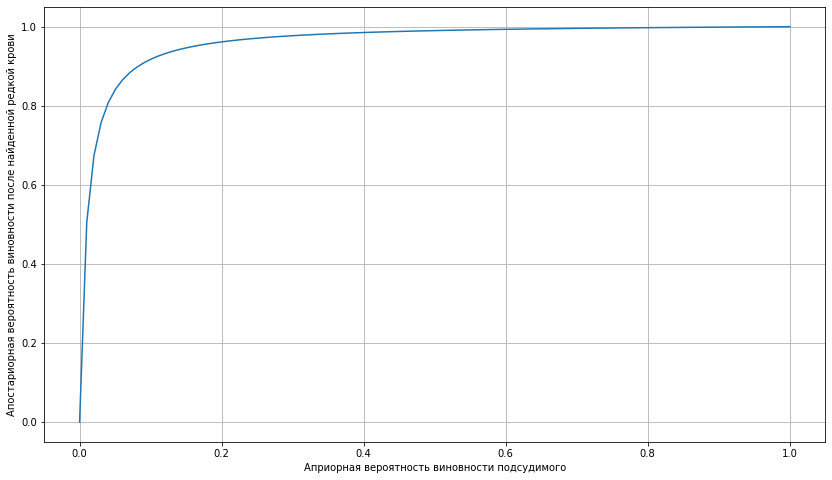

In [104]:
p_guilty_if_found_blood = lambda p_guilty: p_guilty / (p_guilty + 0.01 * (1 - p_guilty))

fig = plt.figure(figsize=(14, 8))
p_guilty = np.linspace(0, 1, 100)

plt.plot(p_guilty, p_guilty_if_found_blood(p_guilty))
plt.xlabel('Априорная вероятность виновности подсудимого')
plt.ylabel('Апостариорная вероятность виновности после найденной редкой крови')
plt.grid(True)

По сути теперь задача прокурора и адвоката оценить априорную вероятность вины подсудимого. Первый будет настаивать на том что даже если такая вероятность в районе 50%, то с учетом новых доказательств, можно предположить, что она намного выше. А адвокат покажет, что изначальная вероятность была низкая, типа у него есть алиби, и даже с учетом новых доказательств она останется все еще низкой и обвинить подсудимого будет нельзя.

### Задание 2

Адвокат не прав в том, что он посчитал, что у каждого человека в городе равная вероятность оказаться убийцей, что врятли соответствует действительности. По сути прокурор опять же оценил априорную вероятность иметь редкую группу крови, но сама по себе она никак не связана с тем является ли или нет подсудимый виновным.
Адвокату бы стоило оценить вероятность того, что группы крови убийцы совпала с группой крови подсудимого при условии, что подсудимый невиновен. 

### Задание 3

In [2]:
P_COVID_POSITIVE = 0.01
P_COVID_NEGATIVE = 1 - P_COVID_POSITIVE
P_TEST_ERROR = 0.05

Пусть:
P_TEST_POSITIVE_IF_COVID_NEGATIVE - ошибка первого рода, т.е. указать что человек болен, хотя он здоров
P_TEST_NEGATIVE_IF_COVID_POSITIVE - ошибка второго рода, т.е. вероятность не распознать болезнь

In [4]:
P_COVID_POSITIVE_IF_TEST_POSITIVE = \
    lambda fp, fn: (1 - fn) * P_COVID_POSITIVE / ((1 - fn) * P_COVID_POSITIVE + fp * P_COVID_NEGATIVE)

P_COVID_POSITIVE_IF_TEST_NEGATIVE = \
    lambda fp, fn: fn * P_COVID_POSITIVE / (fn * P_COVID_POSITIVE + (1 - fp) * P_COVID_NEGATIVE)

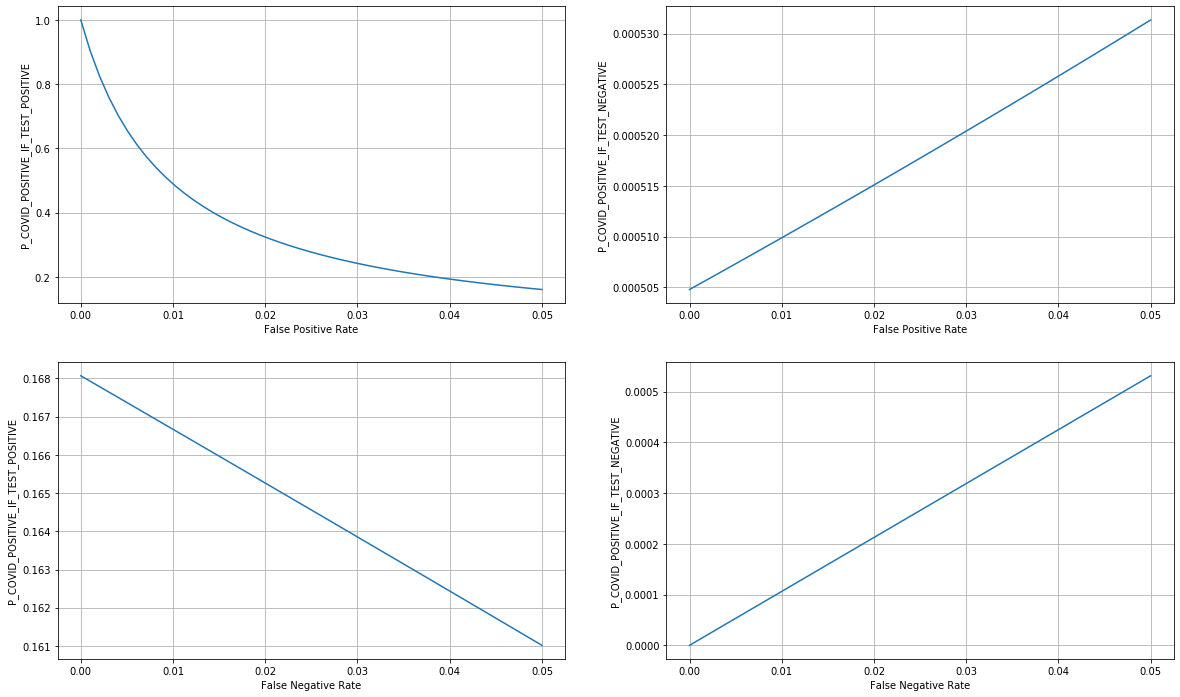

In [85]:
fig = plt.figure(figsize=(20, 12))

# Зафиксируем false negative (fn) и построим график в зависимости от false positive (fp)
fn = P_TEST_ERROR
fp = np.linspace(0, 0.05, 50)

plt.subplot(221)
plt.plot(fp, P_COVID_POSITIVE_IF_TEST_POSITIVE(fp, fn))
plt.xlabel('False Positive Rate')
plt.ylabel('P_COVID_POSITIVE_IF_TEST_POSITIVE')
plt.grid(True)

plt.subplot(222)
plt.plot(fp, P_COVID_POSITIVE_IF_TEST_NEGATIVE(fp, fn))
plt.xlabel('False Positive Rate')
plt.ylabel('P_COVID_POSITIVE_IF_TEST_NEGATIVE')
plt.grid(True)

# Зафиксируем false positive (fp) и построим график в зависимости от false negative (fn)
fn = np.linspace(0, 0.05, 50)
fp = P_TEST_ERROR

plt.subplot(223)
plt.plot(fn, P_COVID_POSITIVE_IF_TEST_POSITIVE(fp, fn))
plt.xlabel('False Negative Rate')
plt.ylabel('P_COVID_POSITIVE_IF_TEST_POSITIVE')
plt.grid(True)

plt.subplot(224)
plt.plot(fn, P_COVID_POSITIVE_IF_TEST_NEGATIVE(fp, fn))
plt.xlabel('False Negative Rate')
plt.ylabel('P_COVID_POSITIVE_IF_TEST_NEGATIVE')
plt.grid(True)

Первый вывод, который можно сделать - уменьшение False Negatve Rate практически не влияет на чувствительность теста, т.е. на вероятность того, что человек действительно болеет, если тест положителен. С другой стороны уменьшение False Positive Rate практически не влияет на вероятность того, что человек болен, если тест оказался отрицательным, другими словами вероятность упустить больного пациента. 

Получается главный вопрос, который мы должны себе задать: что врачам будет важнее? 

На текущий момент в России сделано 2,8 млн тестов и выявлено 80949 положительных случаев.
Если оставить точность теста на уровне 0.05, то получается, что врачи пропустили порядка 1400 больных людей, сказав им что они здоровы, хотя они на самом деле носители вируса. И 68 тысяч человек получили ложно положительный тест, и были изолированы или отправлены в больницу с ложным диагнозом.

В сущности оба показателя крайне важны, но в такой конфигурации кажется можно значительно эффективней понизить загрузку больниц, если понижать False Positive Rate. С другой стороны, если ресурсы доступны, то понижать false negative rate конечно важнее с точки зрения максимального погашения эпидемии.